In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

In [2]:
import os 
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)) :
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [5]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                      image     label
0         train\angry\Training_10118481.jpg     angry
1         train\angry\Training_10120469.jpg     angry
2         train\angry\Training_10131352.jpg     angry
3         train\angry\Training_10161559.jpg     angry
4          train\angry\Training_1021836.jpg     angry
...                                     ...       ...
28704  train\surprise\Training_99916297.jpg  surprise
28705  train\surprise\Training_99924420.jpg  surprise
28706  train\surprise\Training_99937001.jpg  surprise
28707  train\surprise\Training_99951755.jpg  surprise
28708  train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'],test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                                      image     label
0       test\angry\PrivateTest_10131363.jpg     angry
1       test\angry\PrivateTest_10304478.jpg     angry
2        test\angry\PrivateTest_1054527.jpg     angry
3       test\angry\PrivateTest_10590091.jpg     angry
4        test\angry\PrivateTest_1109992.jpg     angry
...                                     ...       ...
7173  test\surprise\PublicTest_98089595.jpg  surprise
7174  test\surprise\PublicTest_98567249.jpg  surprise
7175  test\surprise\PublicTest_98972870.jpg  surprise
7176  test\surprise\PublicTest_99242645.jpg  surprise
7177  test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]


In [9]:
print(test)
print(test['image'])

                                      image     label
0       test\angry\PrivateTest_10131363.jpg     angry
1       test\angry\PrivateTest_10304478.jpg     angry
2        test\angry\PrivateTest_1054527.jpg     angry
3       test\angry\PrivateTest_10590091.jpg     angry
4        test\angry\PrivateTest_1109992.jpg     angry
...                                     ...       ...
7173  test\surprise\PublicTest_98089595.jpg  surprise
7174  test\surprise\PublicTest_98567249.jpg  surprise
7175  test\surprise\PublicTest_98972870.jpg  surprise
7176  test\surprise\PublicTest_99242645.jpg  surprise
7177  test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         test\angry\PrivateTest_10131363.jpg
1         test\angry\PrivateTest_10304478.jpg
2          test\angry\PrivateTest_1054527.jpg
3         test\angry\PrivateTest_10590091.jpg
4          test\angry\PrivateTest_1109992.jpg
                        ...                  
7173    test\surprise\PublicTest_98089595.jpg
7174 

In [10]:
from tqdm import tqdm

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [12]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]c:\Users\ashmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 28709/28709 [02:03<00:00, 233.12it/s]


In [13]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:30<00:00, 239.11it/s]


In [14]:
from keras_preprocessing.image.utils import load_img

In [15]:
from PIL import Image

In [16]:
import cv2
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image_path in tqdm(images, desc="Extracting Features"):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        features.append(img)
    return features

In [17]:
import numpy as np

In [18]:
train_features = np.array(train_features)
test_features = np.array(test_features)

In [19]:
x_train = train_features/255.0
x_test = test_features/255.0

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [24]:
x_train

array([[[[0.19607843],
         [0.1254902 ],
         [0.05882353],
         ...,
         [0.52156863],
         [0.59215686],
         [0.3372549 ]],

        [[0.22352941],
         [0.13333333],
         [0.08627451],
         ...,
         [0.54117647],
         [0.59215686],
         [0.34901961]],

        [[0.23921569],
         [0.11764706],
         [0.09411765],
         ...,
         [0.55686275],
         [0.58431373],
         [0.34901961]],

        ...,

        [[0.40392157],
         [0.39215686],
         [0.39215686],
         ...,
         [0.58431373],
         [0.40784314],
         [0.33333333]],

        [[0.41960784],
         [0.43529412],
         [0.44313725],
         ...,
         [0.59215686],
         [0.47058824],
         [0.3372549 ]],

        [[0.40784314],
         [0.40784314],
         [0.43921569],
         ...,
         [0.56078431],
         [0.53333333],
         [0.3254902 ]]],


       [[[0.11372549],
         [0.09411765],
         [0.11

In [25]:
x_train[0]

array([[[0.19607843],
        [0.1254902 ],
        [0.05882353],
        ...,
        [0.52156863],
        [0.59215686],
        [0.3372549 ]],

       [[0.22352941],
        [0.13333333],
        [0.08627451],
        ...,
        [0.54117647],
        [0.59215686],
        [0.34901961]],

       [[0.23921569],
        [0.11764706],
        [0.09411765],
        ...,
        [0.55686275],
        [0.58431373],
        [0.34901961]],

       ...,

       [[0.40392157],
        [0.39215686],
        [0.39215686],
        ...,
        [0.58431373],
        [0.40784314],
        [0.33333333]],

       [[0.41960784],
        [0.43529412],
        [0.44313725],
        ...,
        [0.59215686],
        [0.47058824],
        [0.3372549 ]],

       [[0.40784314],
        [0.40784314],
        [0.43921569],
        ...,
        [0.56078431],
        [0.53333333],
        [0.3254902 ]]])

In [26]:
x_test.shape, y_test.shape 

((7178, 48, 48, 1), (7178, 7))

In [27]:
x_train.shape, y_train.shape 

((28709, 48, 48, 1), (28709, 7))

# Model Building

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [35]:
model = Sequential()
# Convolutional layer
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate= 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 23, 23, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 23, 23, 128)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 10, 10, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 10, 10, 256)      

In [29]:
def relu(x):
    return max(0, x)

In [ ]:
import numpy as np

# Custom ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Convolutional layer
def conv2d(input_data, num_filters, filter_size, activation):
    # Random initialization of weights and biases
    weights = np.random.randn(filter_size[0], filter_size[1], input_data.shape[-1], num_filters)
    biases = np.zeros((1, 1, 1, num_filters))

    conv_output = np.zeros((input_data.shape[0] - filter_size[0] + 1,
                            input_data.shape[1] - filter_size[1] + 1,
                            num_filters))

    # Convolution operation
    for f in range(num_filters):
        for h in range(conv_output.shape[0]):
            for w in range(conv_output.shape[1]):
                conv_output[h, w, f] = np.sum(input_data[h:h+filter_size[0], w:w+filter_size[1]] * weights[:, :, :, f]) + biases[:, :, :, f]

    # Activation function
    if activation == 'relu':
        return relu(conv_output)
    else:
        return conv_output

# Max pooling layer
def max_pooling(input_data, pool_size):
    pooled_output = np.zeros((input_data.shape[0] // pool_size[0],
                              input_data.shape[1] // pool_size[1],
                              input_data.shape[2]))
    
    for h in range(0, input_data.shape[0], pool_size[0]):
        for w in range(0, input_data.shape[1], pool_size[1]):
            for f in range(input_data.shape[2]):
                pooled_output[h // pool_size[0], w // pool_size[1], f] = np.max(input_data[h:h+pool_size[0], w:w+pool_size[1], f])

    return pooled_output

# Dropout layer
def dropout(input_data, rate):
    keep_prob = 1 - rate
    mask = np.random.rand(*input_data.shape) < keep_prob
    return input_data * mask / keep_prob

# Fully connected layer
def dense(input_data, units, activation):
    # Random initialization of weights and biases
    weights = np.random.randn(input_data.shape[1], units)
    biases = np.zeros((1, units))

    output = np.dot(input_data, weights) + biases

    # Activation function
    if activation == 'relu':
        return relu(output)
    else:
        return output

# Input shape
input_shape = (48, 48, 1)

# Number of classes
num_classes = 7

# Input placeholder
inputs = np.zeros((input_shape[0], input_shape[1], input_shape[2]))

# Convolutional layers
conv1 = conv2d(inputs, num_filters=128, filter_size=(3, 3), activation='relu')
pool1 = max_pooling(conv1, pool_size=(2, 2))
dropout1 = dropout(pool1, rate=0.4)

conv2 = conv2d(dropout1, num_filters=256, filter_size=(3, 3), activation='relu')
pool2 = max_pooling(conv2, pool_size=(2, 2))
dropout2 = dropout(pool2, rate=0.4)

conv3 = conv2d(dropout2, num_filters=512, filter_size=(3, 3), activation='relu')
pool3 = max_pooling(conv3, pool_size=(2, 2))
dropout3 = dropout(pool3, rate=0.4)

conv4 = conv2d(dropout3, num_filters=512, filter_size=(3, 3), activation='relu')
pool4 = max_pooling(conv4, pool_size=(2, 2))
dropout4 = dropout(pool4, rate=0.4)

# Flatten layer
flatten = dropout4.reshape((dropout4.shape[0], -1))

# Fully connected layers
dense1 = dense(flatten, units=512, activation='relu')
dropout5 = dropout(dense1, rate=0.4)

dense2 = dense(dropout5, units=256, activation='relu')
dropout6 = dropout(dense2, rate=0.3)

# Output layer
output = dense(dropout6, units=num_classes, activation='softmax')

# Print model summary
print("Model Summary:")
print("--------------")
print("Input Shape:", inputs.shape)
print("Conv1 Shape:", conv1.shape)
print("Pool1 Shape:", pool1.shape)
print("Conv2 Shape:", conv2.shape)
print("Pool2 Shape:", pool2.shape)
print("Conv3 Shape:", conv3.shape)
print("Pool3 Shape:", pool3.shape)
print("Conv4 Shape:", conv4.shape)
print("Pool4 Shape:", pool4.shape)
print("Flatten Shape:", flatten.shape)
print("Dense1 Shape:", dense1.shape)
print("Dense2 Shape:", dense2.shape)
print("Output Shape:", output.shape)

In [36]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.4))

# Flattening layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

# Model compilation
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 23, 23, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 23, 23, 128)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 10, 10, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 10, 10, 256)      

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics='accuracy')

In [38]:
model.fit(x= x_train,y = y_train,batch_size= 128,epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


225/225 [==============================] - 154s 676ms/step - loss: 1.8221 - accuracy: 0.2478 - val_loss: 1.8133 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 150s 668ms/step - loss: 1.8139 - accuracy: 0.2509 - val_loss: 1.8012 - val_accuracy: 0.2524
Epoch 3/100
225/225 [==============================] - 150s 667ms/step - loss: 1.7452 - accuracy: 0.2797 - val_loss: 1.6496 - val_accuracy: 0.3267
Epoch 4/100
225/225 [==============================] - 150s 669ms/step - loss: 1.6161 - accuracy: 0.3527 - val_loss: 1.4913 - val_accuracy: 0.4223
Epoch 5/100
225/225 [==============================] - 152s 677ms/step - loss: 1.5119 - accuracy: 0.4097 - val_loss: 1.4069 - val_accuracy: 0.4512
Epoch 6/100
225/225 [==============================] - 151s 670ms/step - loss: 1.4521 - accuracy: 0.4425 - val_loss: 1.3323 - val_accuracy: 0.4862
Epoch 7/100
225/225 [==============================] - 150s 664ms/step - loss: 1.4000 - accuracy: 0.4619 - val_loss:

In [39]:
from keras.models import model_from_json

In [54]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

# predicting a model

In [55]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [56]:
import matplotlib.pyplot as plot

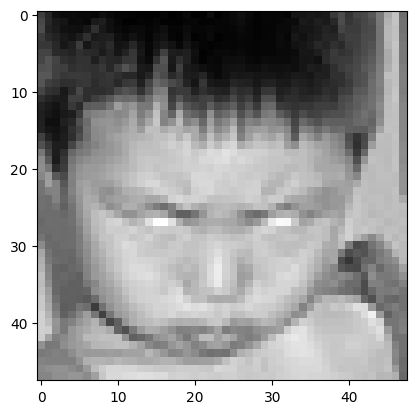

In [57]:
plot.imshow(x_train[0], cmap='gray')

In [58]:
image = 'train/surprise/Training_353184.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of surprise
1/1 [==============================] - 0s 48ms/step
model prediction is  surprise


c:\Users\ashmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [59]:
image = 'train/disgust/Training_5459858.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of disgust
1/1 [==============================] - 0s 48ms/step
model prediction is  disgust


original image is of angry
1/1 [==============================] - 0s 41ms/step
model prediction is  angry


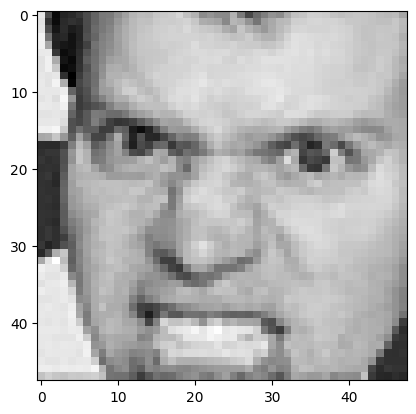

In [60]:
image = 'train/angry/Training_1329550.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plot.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 [==============================] - 0s 25ms/step
model prediction is  neutral


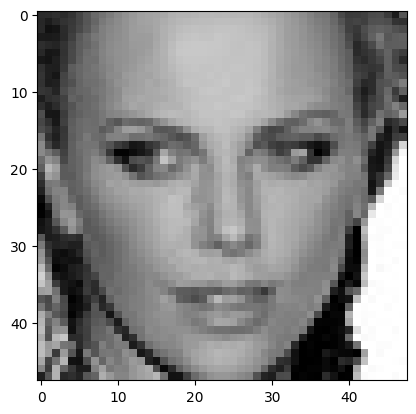

In [46]:
image = 'train/neutral/Training_431269.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plot.imshow(img.reshape(48,48),cmap='gray')

In [47]:
image = 'train/fear/Training_545062.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of fear
1/1 [==============================] - 0s 22ms/step
model prediction is  fear


original image is of fear
1/1 [==============================] - 0s 10ms/step
model prediction is  fear


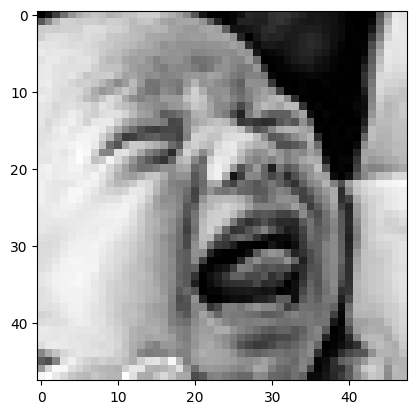

In [62]:
image = 'train/fear/Training_545062.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plot.imshow(img.reshape(48,48),cmap='gray')

# Fitting the model

In [40]:
from keras.models import model_from_json

In [41]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)   
model.save("model.h5")

c:\Users\ashmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
(test_image, train_label), (test_image, test_label) = tf.keras.datasets.mnist.load_data()

In [43]:
import tensorflow as tf

In [44]:
model= tf.keras.models.load_model("model.h5") 

225/225 [==============================] - 11s 49ms/step


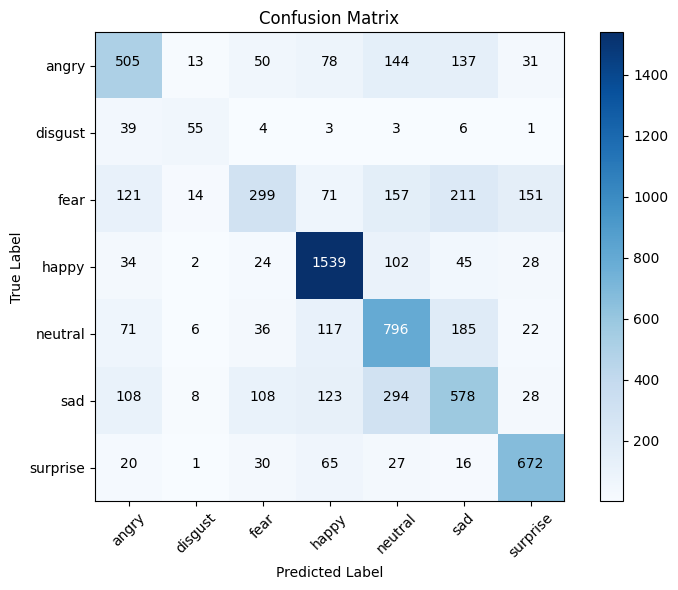

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Assuming you have your x_test, y_test, and model already defined and trained

# Get predicted labels for the test dataset
predicted_labels = model.predict(x_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert one-hot encoded true labels back to class labels if necessary
true_labels = np.argmax(y_test, axis=1)

# Define your labels
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate confusion matrix with counts
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have your x_test and y_test data
# Assuming you have your model already defined and trained

# Get predicted labels for the test dataset
predicted_labels = model.predict(x_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert one-hot encoded true labels back to class labels if necessary
true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='macro')  # Use 'macro' for multiclass classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='macro')  # Use 'macro' for multiclass classification
print("Recall:", recall)


225/225 [==============================] - 11s 49ms/step
Accuracy: 0.6191139593201449
Precision: 0.5950257432063202
Recall: 0.5857021624759878
